In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
signal_trees = ObjIter([Tree(fn) for fn in fc.eightb.accstudies.raw_no_pu.signal_list])

100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


In [3]:
signal_trees_pu = ObjIter([Tree(fn) for fn in fc.eightb.accstudies.raw_with_pu.signal_list])


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


In [4]:
good_jets = CollectionFilter('jet',pt_min=20)
signal_trees = signal_trees.apply(good_jets)
signal_trees_pu = signal_trees_pu.apply(good_jets)


In [ ]:
all_trees =signal_trees+signal_trees_pu

In [ ]:
def get_point(label):
    label = label.split('_')
    return str((int(label[1]),int(label[3])))
signal_points = list(map(get_point,signal_trees.sample))

In [ ]:
dout = "gen_studies/recojets/"

In [ ]:
all_trees.extend(kwargs=lambda t : dict(
    n_jet = ak.count(t.jet_pt,axis=-1),
    n_sig_jet=ak.sum(t.jet_signalId>-1,axis=-1),
    n_ext_jet=ak.sum(t.jet_signalId==-1,axis=-1),
))

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
varinfo.clear()

# Event Selection Applied

## - NO Trigger
## - Require there to be 8 jets 
## - NO requirements on the jets
## - Filter jets by $P_{T}$ | $P_{T} > 20$ [GeV]

# Number of Higgs B-jets vs Non Higgs B-Jets | $P_{T} > 20$ [GeV]

100%|██████████| 3/3 [00:04<00:00,  1.40s/it]


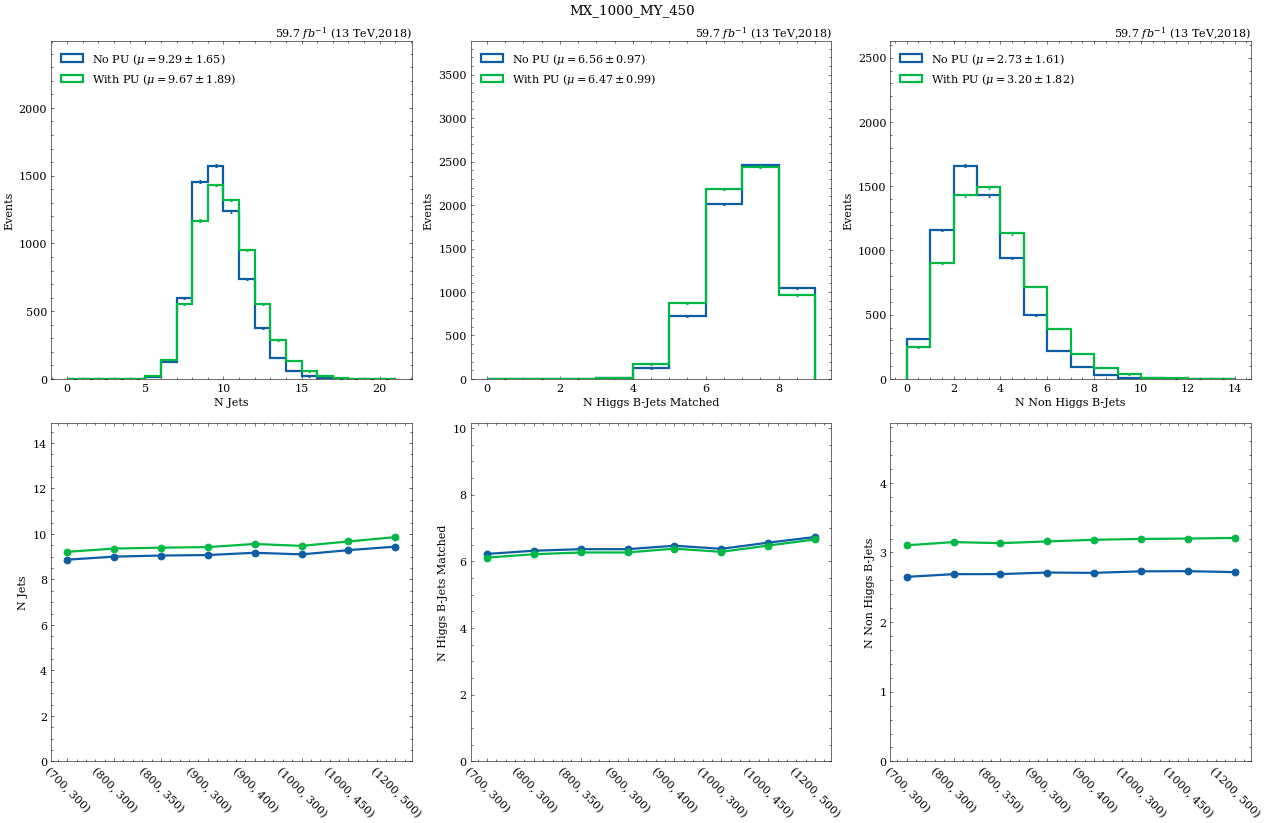

In [10]:

varlist = ['n_jet','n_sig_jet','n_ext_jet']
xlabels = ['N Jets','N Higgs B-Jets Matched','N Non Higgs B-Jets']

fig,axs = study.get_figax(6, dim=(2,3))
study.quick(
    [tree,tree_pu],
    varlist=varlist, legend=True,
    h_label_stat = 'mean_stdv',
    label=["No PU","With PU"],
    h_color=None, suptitle=tree.sample,
    dim=(-1,3),
    xlabels=xlabels,
    figax=(fig,axs[0])
)

for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_arrays(np.arange(len(signal_points)),[array[:,0],array_pu[:,0]],xlabel=signal_points,ylabel=xlabel,figax=(fig,axs[1][i]))

In [11]:
all_trees.extend(kwargs = lambda t : dict(
    n_eta_tagged = ak.sum( np.abs(t.jet_eta) < 2.5,axis=-1 ),
    n_eta_untagged = ak.sum( np.abs(t.jet_eta) > 2.5,axis=-1 ),
    n_matched_eta_tagged = ak.sum( (t.jet_signalId > -1) & (np.abs(t.jet_eta) < 2.5),axis=-1 ),
    n_matched_eta_untagged = ak.sum( (t.jet_signalId > -1) & (np.abs(t.jet_eta) > 2.5),axis=-1 ),
    n_unmatched_eta_tagged = ak.sum( (t.jet_signalId == -1) & (np.abs(t.jet_eta) < 2.5),axis=-1 ),
    n_unmatched_eta_untagged = ak.sum( (t.jet_signalId == -1) & (np.abs(t.jet_eta) > 2.5),axis=-1 ),
));

# Number of Higgs B-jets vs Non Higgs B-Jets | $P_{T} > 20$ [GeV] & Inside $|\eta|$ < 2.5

100%|██████████| 3/3 [00:00<00:00, 14.95it/s]


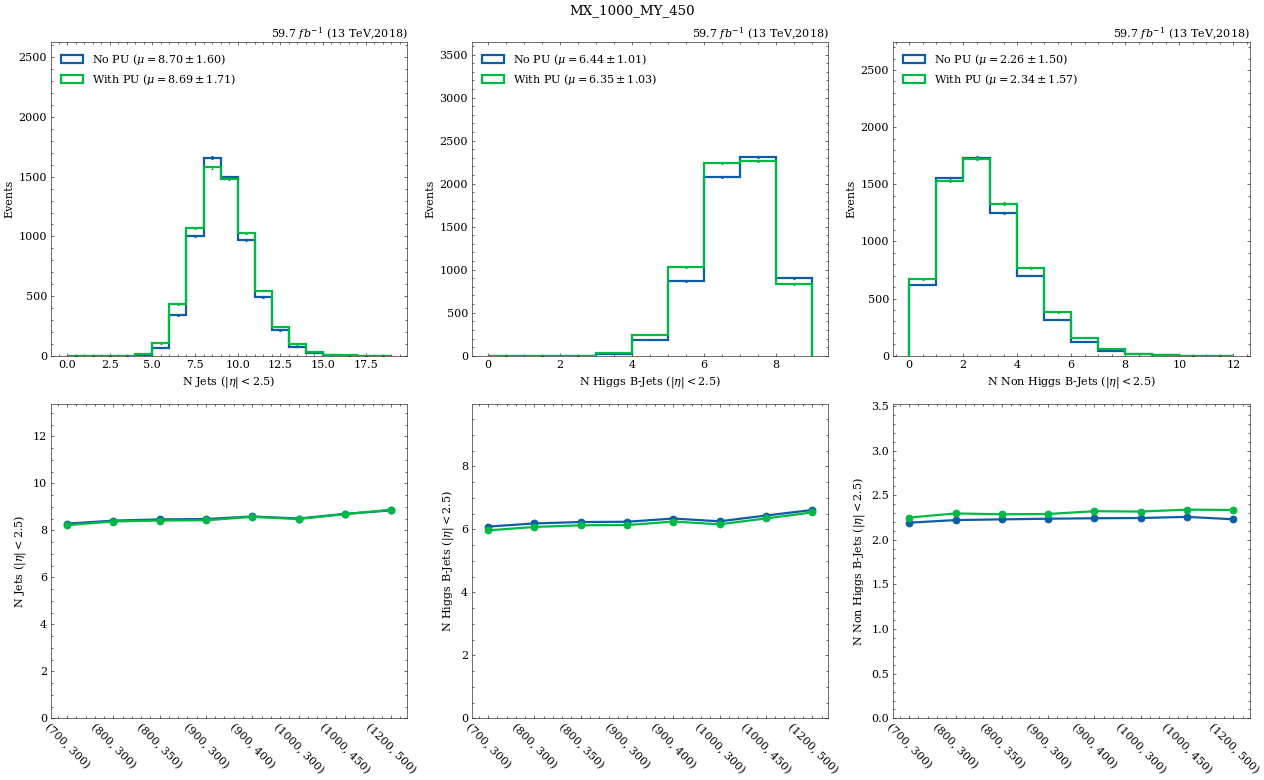

In [12]:
varlist = ['n_eta_tagged','n_matched_eta_tagged','n_unmatched_eta_tagged']
xlabels = ['N Jets ($|\eta|<2.5$)','N Higgs B-Jets ($|\eta|<2.5$)','N Non Higgs B-Jets ($|\eta|<2.5$)']

fig,axs = study.get_figax(6, dim=(2,3))
study.quick(
    [tree,tree_pu],
    varlist=varlist, legend=True,
    h_label_stat = 'mean_stdv',
    label=["No PU","With PU"],
    h_color=None, suptitle=tree.sample,
    dim=(-1,3),
    xlabels=xlabels,
    figax=(fig,axs[0])
)

for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_arrays(np.arange(len(signal_points)),[array[:,0],array_pu[:,0]],xlabel=signal_points,ylabel=xlabel,figax=(fig,axs[1][i]))
    
fig.tight_layout()

# Number of Higgs B-jets vs Non Higgs B-Jets | $P_{T} > 20$ [GeV] & outside $|\eta|$ > 2.5

100%|██████████| 3/3 [00:00<00:00, 17.03it/s]


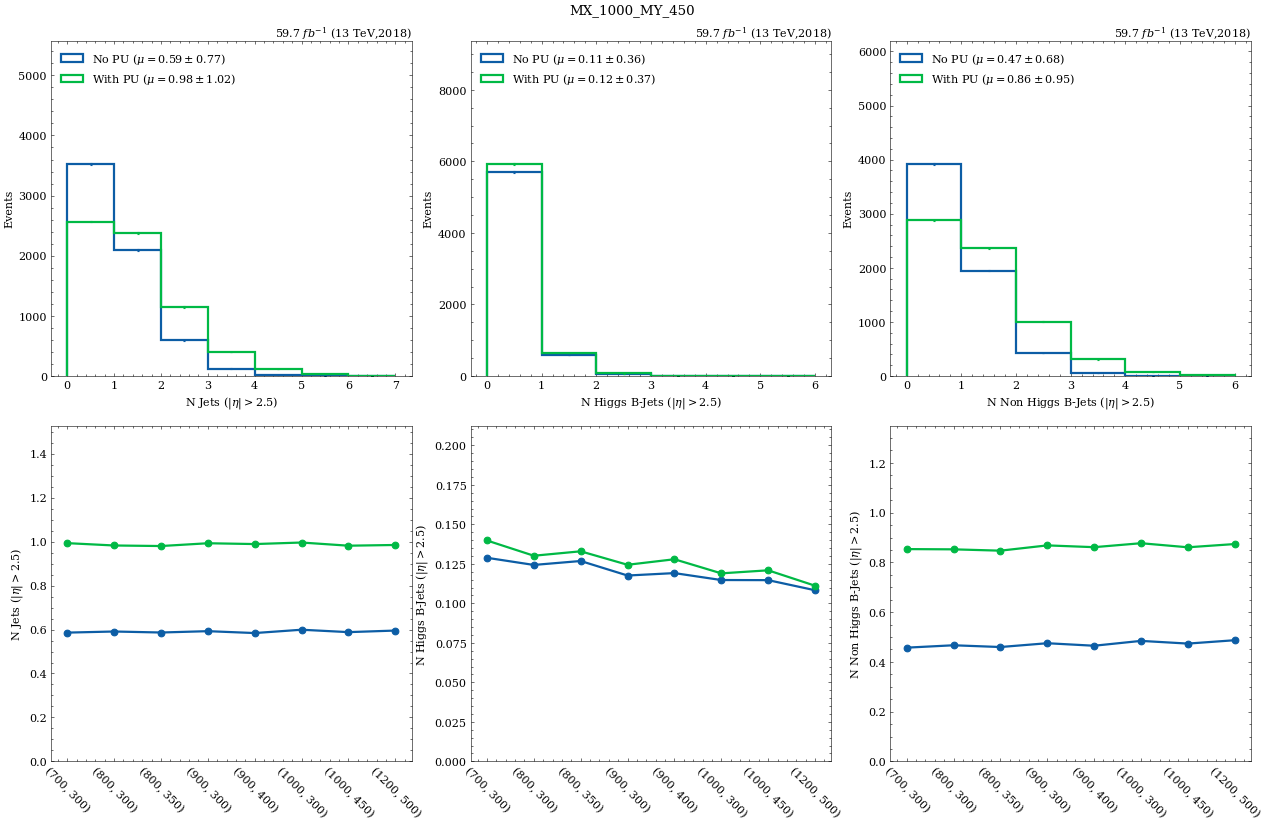

In [13]:
varlist = ['n_eta_untagged','n_matched_eta_untagged','n_unmatched_eta_untagged']
xlabels = ['N Jets ($|\eta|>2.5$)','N Higgs B-Jets ($|\eta|>2.5$)','N Non Higgs B-Jets ($|\eta|>2.5$)']

fig,axs = study.get_figax(6, dim=(2,3))
study.quick(
    [tree,tree_pu],
    varlist=varlist, legend=True,
    h_label_stat = 'mean_stdv',
    label=["No PU","With PU"],
    h_color=None, suptitle=tree.sample,
    dim=(-1,3),
    xlabels=xlabels,
    figax=(fig,axs[0])
)

for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_arrays(np.arange(len(signal_points)),[array[:,0],array_pu[:,0]],xlabel=signal_points,ylabel=xlabel,figax=(fig,axs[1][i]))